In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from Bio import SeqIO
from Bio.Seq import Seq  # Import the Seq class
from Bio.SeqRecord import SeqRecord  # Import the SeqRecord class for creating sequence records
from collections import defaultdict

In [2]:
proj_dir="/master/nplatt/sch_hae_its-nigeria/"
os.chdir(f"{proj_dir}/results/filter_genotypes/SH_V3")

In [3]:
info_df=pd.read_csv(f"{proj_dir}/its-nigeria_samplesheet.csv", sep=",")
info_df

,wgs_id,its_id,sra,species,country,locale,patient,miracidum
0,Sb_NG_ak_1.1,Sb.ng.ak.1.1F,NaN,sbovis,nigeria,ak,1,1
1,Sb_NG_ak_2.1,sb_ng_ak_2.1,NaN,sbovis,nigeria,ak,2,1
2,Sb_NG_ak_2.2,Sb.ng.ak.2.2F,NaN,sbovis,nigeria,ak,2,2
3,Sb_NG_ak_2.3,Sb.ng.ak.2.3F,NaN,sbovis,nigeria,ak,2,3
4,Sb_NG_ak_3.1,Sb.ng.ak.3.1R,NaN,sbovis,nigeria,ak,3,1
...,...,...,...,...,...,...,...,...
200,Sh_NG_os_3_1,sh_ng_os_3_1,NaN,shaematobium,nigeria,osun,3,1
201,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,NaN,shaematobium,nigeria,osun,3,11
202,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,NaN,shaematobium,nigeria,osun,3,5
203,c_Sh_NG_os_3_6,Sh.ng.os.3.6F,NaN,shaematobium,nigeria,osun,3,6


In [6]:
info_df["species"].value_counts()

species
shaematobium    138
sbovis           43
sbxsc             9
scurassoni        7
shxsb             4
intercalatum      1
guineensis        1
matthei           1
margrebowiei      1
Name: count, dtype: int64

# Initial filtering steps

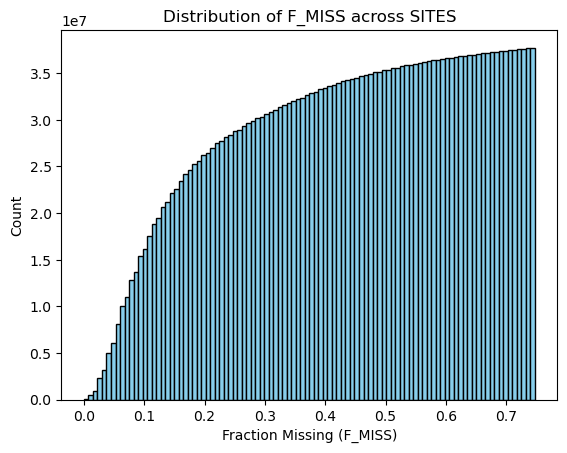

In [12]:
site_df = pd.read_csv("coarse_filtered.site_freq.tbl", sep='\t')

# 2. Create a histogram of the F_MISS column.
plt.hist(site_df['F_MISS'], bins=100, edgecolor='black', color='skyblue', cumulative=True)

# 3. Label axes and give the plot a title
plt.xlabel('Fraction Missing (F_MISS)')
plt.ylabel('Count')
plt.title('Distribution of F_MISS across SITES')

# 4. Display the figure
plt.show()

## Find low gt individuals to remove

In [13]:
# 1. Read the data into a pandas DataFrame.
df = pd.read_csv("coarse_filtered.indv_freq.tbl", sep='\t')
df

,INDV,N_DATA,N_GENOTYPES_FILTERED,N_MISS,F_MISS
0,ERR103051,37736279,0,7684419,0.203635
1,ERR119612,37736279,0,5745915,0.152265
2,ERR119613,37736279,0,6185737,0.163920
3,ERR3012900,37736279,0,8391822,0.222381
4,ERR3012901,37736279,0,8534700,0.226167
...,...,...,...,...,...
205,c_Sh_NG_os_2_2,37736279,0,10842018,0.287310
206,c_Sh_NG_os_3_11,37736279,0,12079063,0.320092
207,c_Sh_NG_os_3_3,37736279,0,5875698,0.155704
208,c_Sh_NG_os_3_5,37736279,0,7131122,0.188973


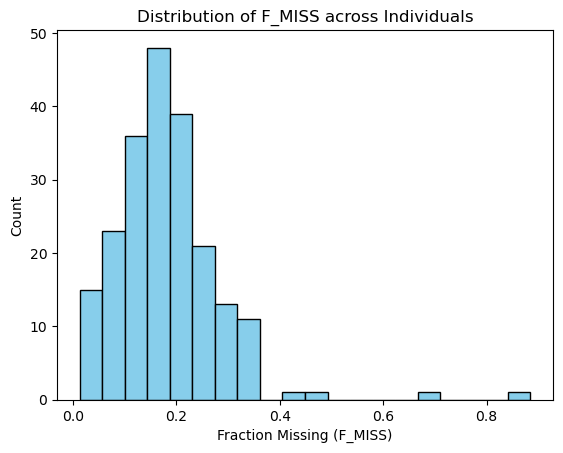

In [14]:
# 2. Create a histogram of the F_MISS column.
plt.hist(df['F_MISS'], bins=20, edgecolor='black', color='skyblue')

# 3. Label axes and give the plot a title
plt.xlabel('Fraction Missing (F_MISS)')
plt.ylabel('Count')
plt.title('Distribution of F_MISS across Individuals')

# 4. Display the figure
plt.show()

In [ ]:
#add outgroup 

In [21]:
outgroups=["margrebowiei"]

In [22]:
info_df.loc[info_df["species"].isin(outgroups), "wgs_id"].to_csv("outgroup.txt", header=False, index=False)

In [23]:
outgroup_ids = info_df.loc[info_df["species"].isin(outgroups), "wgs_id"]
info_df.loc[info_df["species"].isin(outgroups)]

,wgs_id,its_id,prev_wgs_id,sra,species,country,locale,patient,miracidum
185,ERR310940,NaN,margrebowiei_zambia_ERR310940,ERR310940,margrebowiei,zambia,NaN,NaN,NaN


In [24]:
df.loc[df["INDV"].isin(outgroup_ids)]

,INDV,N_DATA,N_GENOTYPES_FILTERED,N_MISS,F_MISS
10,ERR310940,37736279,0,16374792,0.433927


In [25]:
info_df.loc[info_df["species"].isin(["shxsb"])]

,wgs_id,its_id,prev_wgs_id,sra,species,country,locale,patient,miracidum
180,SRR13579880,NaN,SRR13579880,SRR13579880,shxsb,corsica,NaN,NaN,NaN
181,SRR7743801,NaN,SRR7743801,SRR7743801,shxsb,corsica,NaN,NaN,NaN
182,SRR7743802,NaN,SRR7743802,SRR7743802,shxsb,corsica,NaN,NaN,NaN
205,SRR13579879,NaN,SRR13579879,SRR13579879,shxsb,lab,NaN,NaN,NaN


In [26]:
df.loc[df["INDV"].isin(["SRR13579879"])]

,INDV,N_DATA,N_GENOTYPES_FILTERED,N_MISS,F_MISS
32,SRR13579879,37736279,0,33401208,0.885122


In [29]:
%%bash 

conda run -n vcftools --live-stream \
    vcftools \
    --gzvcf coarse_filtered.recode.vcf.gz \
    --keep outgroup.txt \
    --missing-site \
    --stdout \
    >outgroup.site_freq.tbl


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
arse_filtered.recode.vcf.gz
	--keep outgroup.txt
	--missing-site
	--stdout

Using zlib version: 1.3.1
ted at least 2 parts in FORMAT entry: ID=PID,Number=1,Type=String,Description="Physical phasing ID information, where each unique ID within a given sample (but not across samples) connects records within a phasing group">
at least 2 parts in FORMAT entry: ID=RGQ,Number=1,Type=Integer,Description="Unconditional reference genotype confidence, encoded as a phred quality -10*log10 p(genotype call is wrong)">
rts in INFO entry: ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the same order as listed">
=A,Type=Float,Description="Allele Frequency, for each ALT allele, in the same order as listed">
ing: Expected at least 2 parts in INFO entry: ID=AF,Number=A,Type=Float,Description="Allele Frequency, for each ALT allele, in the same order as listed">
ry: ID=MLEAC,

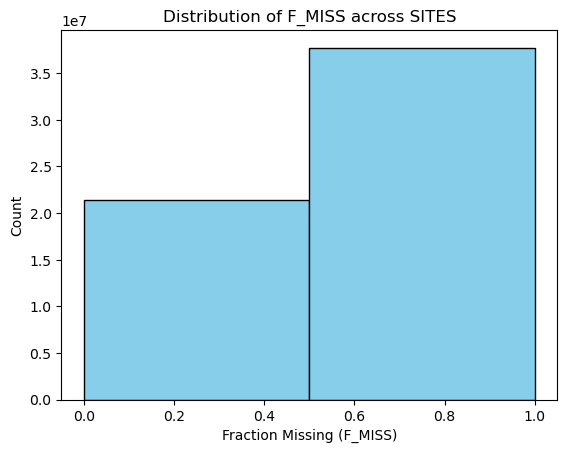

In [31]:
site_df = pd.read_csv("outgroup.site_freq.tbl", sep='\t')

# 2. Create a histogram of the F_MISS column.
plt.hist(site_df['F_MISS'], bins=2, edgecolor='black', color='skyblue', cumulative=True)

# 3. Label axes and give the plot a title
plt.xlabel('Fraction Missing (F_MISS)')
plt.ylabel('Count')
plt.title('Distribution of F_MISS across SITES')
2
# 4. Display the figure
plt.show()

In [32]:
site_df["N_MISS"].value_counts()/len(site_df)

N_MISS
0    0.566073
2    0.433927
Name: count, dtype: float64

In [38]:
site_df.loc[site_df["F_MISS"] == 0, "CHR"].value_counts().head(n=10)

CHR
NC_067196.1       5094120
NC_067195.1       4265137
NC_067198.1       2722009
NC_067199.1       2703598
NC_067197.1       2659716
NC_067201.1       1509465
NC_067202.1       1202008
NC_067200.1       1168749
NW_026137003.1       1876
NW_026137024.1       1747
Name: count, dtype: int64

In [41]:
major_chroms = [ "NC_067196.1",
                 "NC_067195.1",
                 "NC_067198.1",
                 "NC_067199.1",
                 "NC_067197.1",
                 "NC_067201.1",
                 "NC_067202.1", 
                 "NC_067200.1"]

In [45]:
site_df.loc[ ((site_df["F_MISS"] == 0) & 
              (site_df["CHR"].isin(major_chroms))), ["CHR", "POS"]].to_csv("present_outgroup_sample.pos", sep="\t", index=False, header=False)

In [ ]:
%%bash 
conda run -n vcftools --live-stream \
    vcftools \
        --gzvcf coarse_filtered.recode.vcf.gz \
        --positions present_outgroup_sample.pos \
        --missing-site \
        --stdout \
        >outgroup_filt_sites.sites_freq.tbl

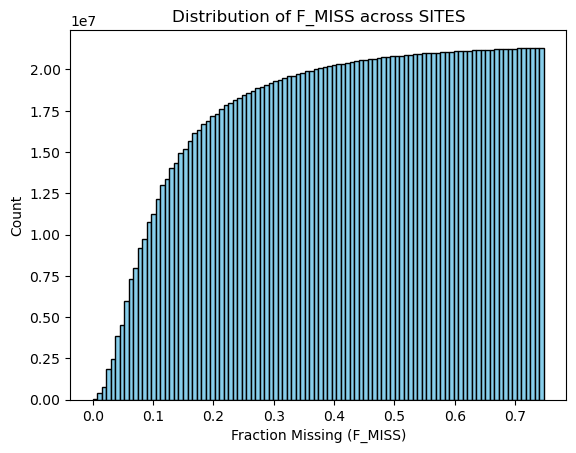

In [46]:
site_df = pd.read_csv("outgroup_filt_sites.sites_freq.tbl", sep='\t')

# 2. Create a histogram of the F_MISS column.
plt.hist(site_df['F_MISS'], bins=100, edgecolor='black', color='skyblue', cumulative=True)

# 3. Label axes and give the plot a title
plt.xlabel('Fraction Missing (F_MISS)')
plt.ylabel('Count')
plt.title('Distribution of F_MISS across SITES')

# 4. Display the figure
plt.show()

In [52]:
site_df.loc[site_df["F_MISS"]<0.1, ["CHR", "POS"]].to_csv("dense.sites_to_keep.list", sep="\t", header=False, index=False)

In [144]:
%%bash 

echo """c_Sh_NG_kn_4_2
c_Sh_NG_od_1_3
Sb_NG_be_1.14
Sb_NG_zm_2.2
c_Sh_NG_eb_3_2""">lack_its.txt

In [145]:
%%bash 

conda run -n vcftools --live-stream \
    vcftools \
        --gzvcf coarse_filtered.recode.vcf.gz \
        --positions dense.sites_to_keep.list \
        --remove lack_its.txt \
        --recode \
        --recode-INFO-all \
        --stdout \
        >dense.sites.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
arse_filtered.recode.vcf.gz
	--remove lack_its.txt
	--recode-INFO-all
ep.listtions dense.sites_to_ke
	--recode
	--stdout

Using zlib version: 1.3.1
ted at least 2 parts in FORMAT entry: ID=PID,Number=1,Type=String,Description="Physical phasing ID information, where each unique ID within a given sample (but not across samples) connects records within a phasing group">
r,Description="Normalized, Phred-scaled likelihoods for genotypes as defined in the VCF specification">
e count in genotypes, for each ALT allele, in the same order as listed">teger,Description="Allel
2 parts in INFO entry: ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the same order as listed">
 entry: ID=AF,Number=A,Type=Float,Description="Allele Frequency, for each ALT allele, in the same order as listed">
cription="Maximum likelihood expectation (MLE) for the allele counts (not necessar

In [146]:
%%bash 

conda run -n vcftools --live-stream \
    vcftools \
        --gzvcf dense.sites.vcf \
        --missing-indv \
        --stdout \
        >dense.sites.indvs_freq.tbl


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
nse.sites.vcf
	--missing-indv
	--stdout

Using zlib version: 1.3.1
ted at least 2 parts in FORMAT entry: ID=PID,Number=1,Type=String,Description="Physical phasing ID information, where each unique ID within a given sample (but not across samples) connects records within a phasing group">
r,Description="Normalized, Phred-scaled likelihoods for genotypes as defined in the VCF specification">
rts in INFO entry: ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the same order as listed">
=A,Type=Float,Description="Allele Frequency, for each ALT allele, in the same order as listed">
ing: Expected at least 2 parts in INFO entry: ID=AF,Number=A,Type=Float,Description="Allele Frequency, for each ALT allele, in the same order as listed">
ry: ID=MLEAC,Number=A,Type=Integer,Description="Maximum likelihood expectation (MLE) for the allele counts (not necessarily the sa

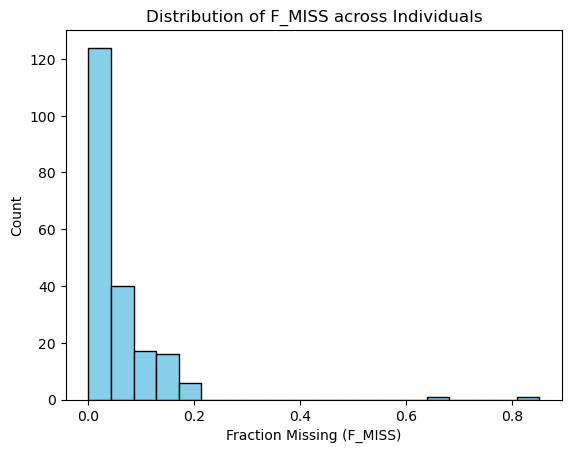

In [147]:
df = pd.read_csv("dense.sites.indvs_freq.tbl", sep='\t')

# 2. Create a histogram of the F_MISS column.
plt.hist(df['F_MISS'], bins=20, edgecolor='black', color='skyblue')

# 3. Label axes and give the plot a title
plt.xlabel('Fraction Missing (F_MISS)')
plt.ylabel('Count')
plt.title('Distribution of F_MISS across Individuals')

# 4. Display the figure
plt.show()

In [148]:
df.loc[df["F_MISS"]>0.50]

,INDV,N_DATA,N_GENOTYPES_FILTERED,N_MISS,F_MISS
32,SRR13579879,10779383,0,9171972,0.850881
33,SRR13579880,10779383,0,7242653,0.671899


# LD filter

In [149]:
%%bash

conda run -n plink --live-stream \
    plink2 \
        --vcf dense.sites.vcf \
        --allow-extra-chr \
        --double-id \
        --indep-pairwise 25 5 0.20 \
        --out dense.sites.ld

PLINK v2.00a5.12LM 64-bit Intel (25 Jun 2024)  www.cog-genomics.org/plink/2.0/
urcell, Christopher Chang   GNU General Public License v3
Logging to dense.sites.ld.log.
effect: in 
  --allow-extra-chr
  --double-id
  --indep-pairwise 25 5 0.20
  --out dense.sites.ld
f dense.sites.vcf

Start time: Fri Sep 19 18:00:44 2025
; reserving 515643 MiB for main816 available
workspace.
Using up to 192 threads (change this with --threads).
--vcf: 10779383 variants scanned.
--vcf: dense.sites.ld-temporary.pgen + dense.sites.ld-temporary.pvar.zst +
.psam written.-temporary
205 samples (0 females, 0 males, 205 ambiguous; 205 founders) loaded from
.ld-temporary.psam.
10779383 variants loaded from dense.sites.ld-temporary.pvar.zst.
ype data present.
done.lating allele frequencies... 0%
6622925/10779383 variants removed.s): 0%
Variant lists written to dense.sites.ld.prune.in and dense.sites.ld.prune.out .
9 18:02:17 2025ep 1


In [150]:
!wc -l dense.sites.ld.prune.in

4156458 dense.sites.ld.prune.in


In [151]:
%%bash

# we are removing SRR13579880 based on the percent of missing data in the results above.
conda run -n vcftools --live-stream \
    vcftools \
        --vcf dense.sites.vcf \
        --exclude dense.sites.ld.prune.out \
        --remove-indv SRR13579880 \
        --not-chr NC_067195.1 \
        --recode \
        --recode-INFO-all \
        --stdout \
        >dense.sites.ld.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
e.sites.vcf
	--not-chr NC_067195.1
	--recode-INFO-all
	--recode
	--exclude dense.sites.ld.prune.out
	--stdout
	--remove-indv SRR13579880

ted at least 2 parts in FORMAT entry: ID=PID,Number=1,Type=String,Description="Physical phasing ID information, where each unique ID within a given sample (but not across samples) connects records within a phasing group">
e count in genotypes, for each ALT allele, in the same order as listed">teger,Description="Allel
2 parts in INFO entry: ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the same order as listed">
mber=A,Type=Float,Description="Allele Frequency, for each ALT allele, in the same order as listed">
 entry: ID=MLEAC,Number=A,Type=Integer,Description="Maximum likelihood expectation (MLE) for the allele counts (not necessarily the same as the AC), for each ALT allele, in the same order as listed">
,Number=A,Ty

In [152]:
%%bash 

conda run -n vcftools --live-stream \
    vcftools \
    --vcf dense.sites.ld.vcf \
    --remove-indv SRR13579879 \
    --missing-site \
    --stdout \
    >dense.sites.ld.site_freq.tbl


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
e.sites.ld.vcf
	--missing-site
	--stdout
	--remove-indv SRR13579879

ted at least 2 parts in FORMAT entry: ID=PID,Number=1,Type=String,Description="Physical phasing ID information, where each unique ID within a given sample (but not across samples) connects records within a phasing group">
r,Description="Normalized, Phred-scaled likelihoods for genotypes as defined in the VCF specification">
rts in INFO entry: ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the same order as listed">
=A,Type=Float,Description="Allele Frequency, for each ALT allele, in the same order as listed">
ing: Expected at least 2 parts in INFO entry: ID=AF,Number=A,Type=Float,Description="Allele Frequency, for each ALT allele, in the same order as listed">
ry: ID=MLEAC,Number=A,Type=Integer,Description="Maximum likelihood expectation (MLE) for the allele counts (not necessarily the 

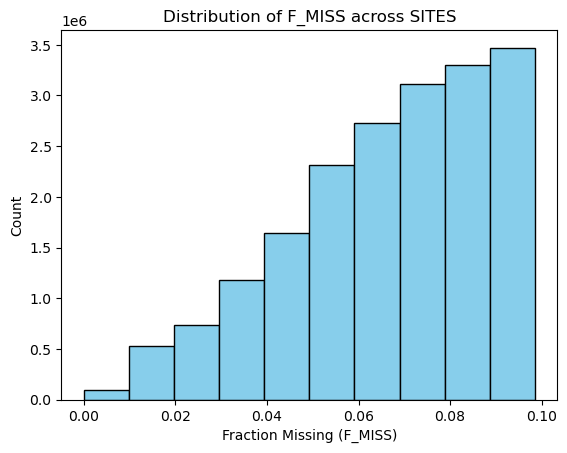

In [153]:
site_df = pd.read_csv("dense.sites.ld.site_freq.tbl", sep='\t')

# 2. Create a histogram of the F_MISS column.
plt.hist(site_df['F_MISS'], edgecolor='black', color='skyblue', cumulative=True)

# 3. Label axes and give the plot a title
plt.xlabel('Fraction Missing (F_MISS)')
plt.ylabel('Count')
plt.title('Distribution of F_MISS across SITES')

# 4. Display the figure
plt.show()

In [154]:
site_df.loc[ site_df["F_MISS"]<0.05, ["CHR", "POS"]] .to_csv("ld.dense.sites_to_keep.list", sep="\t", header=False, index=False)

In [155]:
%%bash 

conda run -n vcftools --live-stream \
    vcftools \
        --vcf dense.sites.ld.vcf \
        --positions ld.dense.sites_to_keep.list \
        --recode \
        --recode-INFO-all \
        --stdout \
        >snvs.ld.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
e.sites.ld.vcf
	--recode-INFO-all
	--positions ld.dense.sites_to_keep.list
	--recode
	--stdout

ted at least 2 parts in FORMAT entry: ID=PID,Number=1,Type=String,Description="Physical phasing ID information, where each unique ID within a given sample (but not across samples) connects records within a phasing group">
e count in genotypes, for each ALT allele, in the same order as listed">teger,Description="Allel
2 parts in INFO entry: ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the same order as listed">
mber=A,Type=Float,Description="Allele Frequency, for each ALT allele, in the same order as listed">
 entry: ID=MLEAC,Number=A,Type=Integer,Description="Maximum likelihood expectation (MLE) for the allele counts (not necessarily the same as the AC), for each ALT allele, in the same order as listed">
,Number=A,Type=Float,Description="Maximum likelihood e

In [156]:
%%bash 

conda run -n vcftools --live-stream \
    vcftools \
        --vcf snvs.ld.vcf \
        --maf 0.05 \
        --recode \
        --recode-INFO-all \
        --stdout \
        >snvs.ld.maf05.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
.ld.vcfsnvs
	--recode-INFO-all
	--maf 0.05
	--recode
	--stdout

ted at least 2 parts in FORMAT entry: ID=PID,Number=1,Type=String,Description="Physical phasing ID information, where each unique ID within a given sample (but not across samples) connects records within a phasing group">
r,Description="Normalized, Phred-scaled likelihoods for genotypes as defined in the VCF specification">
conditional reference genotype confidence, encoded as a phred quality -10*log10 p(genotype call is wrong)">
llele count in genotypes, for each ALT allele, in the same order as listed">r,Description="A
ast 2 parts in INFO entry: ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the same order as listed">
F,Number=A,Type=Float,Description="Allele Frequency, for each ALT allele, in the same order as listed">
Frequency, for each ALT allele, in the same order as listed">r=A,Type=

In [157]:
%%bash 

conda run -n vcftools --live-stream \
    vcftools \
    --vcf snvs.ld.vcf \
    --missing-site \
    --stdout \
    >snvs.ld.site_freq.tbl


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
.ld.vcfsnvs
	--missing-site
	--stdout

ted at least 2 parts in FORMAT entry: ID=PID,Number=1,Type=String,Description="Physical phasing ID information, where each unique ID within a given sample (but not across samples) connects records within a phasing group">
r,Description="Normalized, Phred-scaled likelihoods for genotypes as defined in the VCF specification">
conditional reference genotype confidence, encoded as a phred quality -10*log10 p(genotype call is wrong)">
llele count in genotypes, for each ALT allele, in the same order as listed">r,Description="A
ast 2 parts in INFO entry: ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the same order as listed">
F,Number=A,Type=Float,Description="Allele Frequency, for each ALT allele, in the same order as listed">
Frequency, for each ALT allele, in the same order as listed">r=A,Type=Float,Description="Allele

In [158]:
%%bash 

conda run -n vcftools --live-stream \
    vcftools \
        --vcf snvs.ld.vcf \
        --missing-indv \
        --stdout \
        >snvs.ld.indvs_freq.tbl


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
.ld.vcfsnvs
	--missing-indv
	--stdout

ted at least 2 parts in FORMAT entry: ID=PID,Number=1,Type=String,Description="Physical phasing ID information, where each unique ID within a given sample (but not across samples) connects records within a phasing group">
r,Description="Normalized, Phred-scaled likelihoods for genotypes as defined in the VCF specification">
conditional reference genotype confidence, encoded as a phred quality -10*log10 p(genotype call is wrong)">
llele count in genotypes, for each ALT allele, in the same order as listed">r,Description="A
ast 2 parts in INFO entry: ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the same order as listed">
F,Number=A,Type=Float,Description="Allele Frequency, for each ALT allele, in the same order as listed">
Frequency, for each ALT allele, in the same order as listed">r=A,Type=Float,Description="Allele

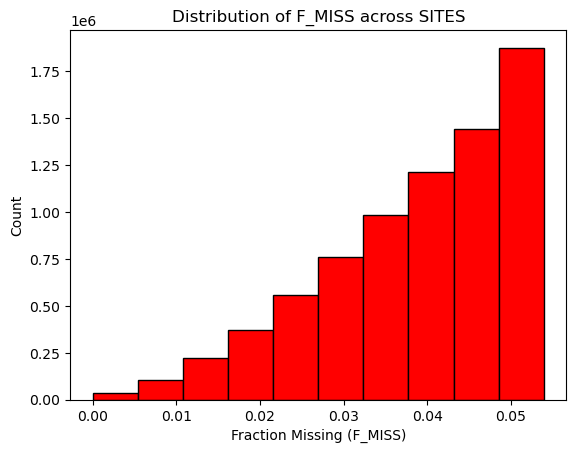

In [4]:
site_df = pd.read_csv("snvs.ld.site_freq.tbl", sep='\t')

# 2. Create a histogram of the F_MISS column.
plt.hist(site_df['F_MISS'], edgecolor='black', color='red', cumulative=True)

# 3. Label axes and give the plot a title
plt.xlabel('Fraction Missing (F_MISS)')
plt.ylabel('Count')
plt.title('Distribution of F_MISS across SITES')

# 4. Display the figure
plt.show()

In [30]:
site_df["N_MISS"].max()/2

np.float64(11.0)

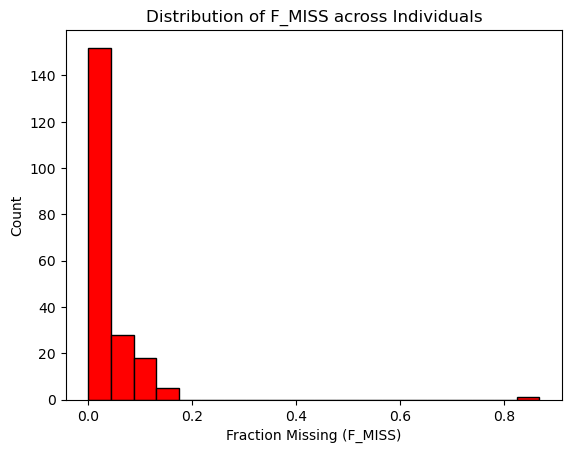

In [5]:
df = pd.read_csv("snvs.ld.indvs_freq.tbl", sep='\t')

# 2. Create a histogram of the F_MISS column.
plt.hist(df['F_MISS'], bins=20, edgecolor='black', color='red')

# 3. Label axes and give the plot a title
plt.xlabel('Fraction Missing (F_MISS)')
plt.ylabel('Count')
plt.title('Distribution of F_MISS across Individuals')

# 4. Display the figure
plt.show()

In [6]:
df.sort_values(by="N_MISS", ascending=False).head()

,INDV,N_DATA,N_GENOTYPES_FILTERED,N_MISS,F_MISS
32,SRR13579879,1877149,0,1629284,0.867957
105,c_Sh_NG_eb_1_3,1877149,0,295390,0.157361
106,c_Sh_NG_eb_2_2,1877149,0,294341,0.156802
166,c_Sh_NG_ks_1_9,1877149,0,268610,0.143095
29,SRR11907458,1877149,0,263633,0.140443


In [161]:
df.loc[df["F_MISS"]>0.60]

,INDV,N_DATA,N_GENOTYPES_FILTERED,N_MISS,F_MISS
32,SRR13579879,1877149,0,1629284,0.867957


In [8]:
df = pd.read_csv("snvs.ld.indvs_freq.tbl", sep='\t')
df["F_MISS"].median()

np.float64(0.017501549999999998)

In [12]:
# site_df = pd.read_csv("snvs.ld.site_freq.tbl", sep='\t')
site_df["N_MISS"].mean()

np.float64(14.14525325373745)

# basic stats describing the data

In [24]:
final_df = info_df.loc[((info_df["wgs_id"].isin(df["INDV"])) & (~info_df["species"].isin(["intercalatum", "guineensis", "matthei"])))]
final_df

,wgs_id,its_id,prev_wgs_id,sra,species,country,locale,patient,miracidum,its_sequence
0,c_Sh_NG_od_4_5,sh_ng_od_4_5,c_Sh_NG_od_4_5,NaN,shaematobium,nigeria,od,4.0,5.0,TTATCATACCCCAAAAATATATAATGATGCATGCACCTGGCTTCTT...
1,c_Sh_NG_bo_6_1,sh_ng_bo_6_1,c_Sh_NG_bo_6_1,NaN,shaematobium,nigeria,bo,6.0,1.0,TTATCATACCCCAAAAATATATAATGATGCATGCACCTGGCTTCTT...
2,c_Sh_NG_ed_2_1,sh_ng_ed_2_1,c_Sh_NG_ed_2_1,NaN,shaematobium,nigeria,ed,2.0,1.0,TTATCATACCCCAAAAATATATAATGATGCATGCACCTGGCTTCTT...
3,c_Sh_NG_kb_2_3,sh_ng_kb_2_3,c_Sh_NG_kb_2_3,NaN,shaematobium,nigeria,kb,2.0,3.0,TTATCATACCCCAAAAATATATAATGATGCATGCACCTGGCTTCTT...
4,c_Sh_NG_kb_2_6,sh_ng_kb_2_6,c_Sh_NG_kb_2_6,NaN,shaematobium,nigeria,kb,2.0,6.0,TTATCATACCCCAAAAATATATAATGATGCATGCACCTGGCTTCTT...
...,...,...,...,...,...,...,...,...,...,...
200,Sb_NG_au_2.8,Sb.ng.au.2.8R,Sb_NG_au_2.8,NaN,sbovis,nigeria,au,2.0,8.0,ATATATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTAC...
201,Sb_NG_be_1.4,Sb.ng.be.1.4R,Sb_NG_be_1.4,NaN,sbovis,nigeria,be,1.0,4.0,ATATATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTAC...
202,Sb_NG_be_3.2,Sb.ng.be.3.2F,Sb_NG_be_3.2,NaN,sbovis,nigeria,be,3.0,2.0,AGTGACCTGCGGAAGGATCATTATCATAACCCAAAAATATATAATG...
203,SRR11907394,sb_sbo_cdivoire_noumousso_107,sbo_cdivoire_noumousso_107,SRR11907394,sbovis,cdivoire,noumousso,NaN,NaN,TTATCATAACCCAAAAATATATAATGATGCATGCACCTGGCTTCTT...


In [ ]:
df["INDV"]